In [347]:
from cv2 import cv2 as cv
import numpy as np
import os
import random
import matplotlib.pyplot as plt

(-0.5, 4031.5, 3023.5, -0.5)

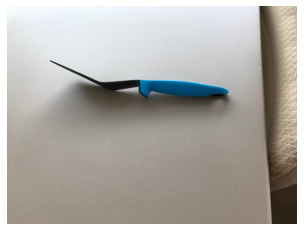

In [348]:
ROOT_DIR = os.path.abspath("E:\\Downloads\\pix3d\\img")
labels=['bed','bookcase','chair','desk','misc','sofa','table','tool','wardrobe']
IMAGE_DIR=os.path.join(ROOT_DIR,random.choice(labels))

file_names = next(os.walk(IMAGE_DIR))[2]
img=cv.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
#img=cv.imread("E:\\VSCodes\\Background Remove\\test.jpeg")
plt.imshow(img[:,:,::-1])
plt.axis('off')

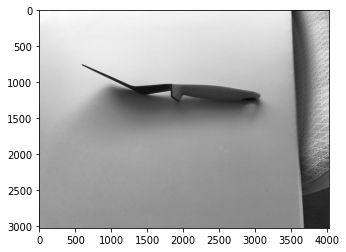

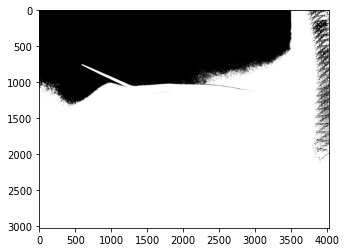

In [349]:
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(gray,cmap='gray')
ret,mask=cv.threshold(gray,200,255,cv.THRESH_BINARY)
mask=np.array(mask)
mask=cv.bitwise_not(mask)
plt.figure()
plt.imshow(mask,cmap='gray')
out1=cv.bitwise_and(img,img,mask=mask)

In [350]:
blurred_float = img.astype(np.float32) / 255.0
edgeDetector = cv.ximgproc.createStructuredEdgeDetection("model.yml")
edges = edgeDetector.detectEdges(blurred_float) * 255.0

edges_ = np.asarray(edges, np.uint8)
edges_=cv.medianBlur(edges_,5)
ret, thresh = cv.threshold(edges_, 10, 255, 0)

contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

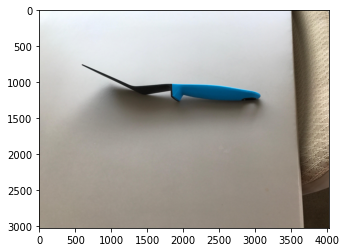

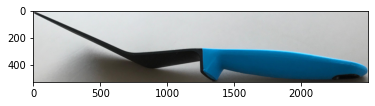

In [351]:
mx_area=0
mx=(0,0,0,0)
for cont in contours:
    x,y,w,h = cv.boundingRect(cont)
    area = w*h
    if area > mx_area:
        mx = x,y,w,h
        mx_area = area
x,y,w,h = mx
#img_cropped=img.copy()
#Output to files
img_cropped=img[y:y+h,x:x+w]
plt.figure()
plt.imshow(img[:,:,::-1])
plt.figure()
plt.imshow(img_cropped[:,:,::-1])

In [352]:
blurred_float = img_cropped.astype(np.float32) / 255.0
edgeDetector = cv.ximgproc.createStructuredEdgeDetection("model.yml")
edges = edgeDetector.detectEdges(blurred_float) * 255.0

(-0.5, 2496.5, 527.5, -0.5)

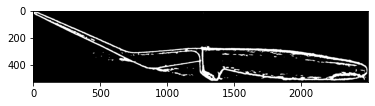

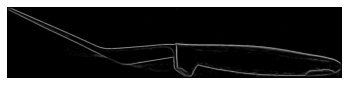

In [364]:
edges_ = np.asarray(edges, np.uint8)
edges_=cv.medianBlur(edges_,5)
ret, thresh = cv.threshold(edges_, 10, 255, 0)
plt.figure()
plt.imshow(thresh,cmap='gray')
plt.figure()
plt.imshow(edges_,cmap='gray')
plt.axis('off')

In [365]:
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

(-0.5, 2496.5, 527.5, -0.5)

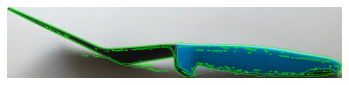

In [366]:
copy_img=np.copy(img_cropped)
cv.drawContours(copy_img, contours, -1, (0,255,0), 2)
plt.imshow(copy_img[:,:,::-1])
plt.axis('off')

(-0.5, 2496.5, 527.5, -0.5)

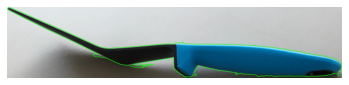

In [367]:
def findSignificantContour(edgeImg):
    contours, hierarchy = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
    # Find level 1 contours
    level1Meta = []
    for contourIndex, tupl in enumerate(hierarchy[0]):
        # Filter the ones without parent
        if tupl[3] == -1:
            tupl = np.insert(tupl.copy(), 0, [contourIndex])
            level1Meta.append(tupl)
    # From among them, find the contours with large surface area.
    contoursWithArea = []
    for tupl in level1Meta:
        contourIndex = tupl[0]
        contour = contours[contourIndex]
        area = cv.contourArea(contour)
        contoursWithArea.append([contour, area, contourIndex])
    contoursWithArea.sort(key=lambda meta: meta[1], reverse=True)
    largestContour = contoursWithArea[0][0]
    return largestContour

contour = findSignificantContour(edges_)
# Draw the contour on the original image
contourImg = np.copy(img_cropped)
cv.drawContours(contourImg, [contour], 0, (0, 255, 0), 2, cv.LINE_AA, maxLevel=1)
plt.imshow(contourImg[:,:,::-1])
plt.axis('off')

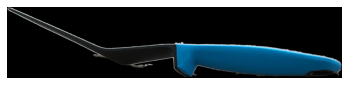

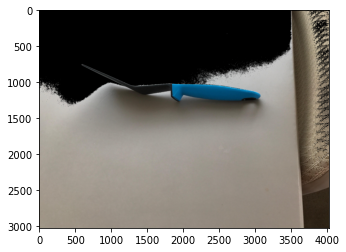

In [368]:
gray=cv.cvtColor(img_cropped,cv.COLOR_BGR2GRAY)
mask = np.zeros_like(gray) # Create mask where white is what we want, black otherwise
cv.drawContours(mask, [contour],0, 255, -1) # Draw filled contour in mask
out2 = np.zeros_like(img_cropped) # Extract out the object and place into output image
out2[mask == 255] = img_cropped[mask == 255]
plt.figure()
plt.imshow(out2[:,:,::-1])
plt.axis('off')
plt.figure()
plt.imshow(out1[:,:,::-1])